In [1]:
#imported module
import pandas as pd

In [2]:
#imported csv file
real_estate = pd.read_csv('realestate.csv',sep=',')

In [3]:
#cleaned dataset from NaN Value
real_estate.dropna()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
#defiend variable
x1=real_estate[real_estate.columns.values[2]][0:]
x2=real_estate[real_estate.columns.values[3]][0:]
x3=real_estate[real_estate.columns.values[4]][0:]
x4=real_estate[real_estate.columns.values[5]][0:]
x5=real_estate[real_estate.columns.values[6]][0:]

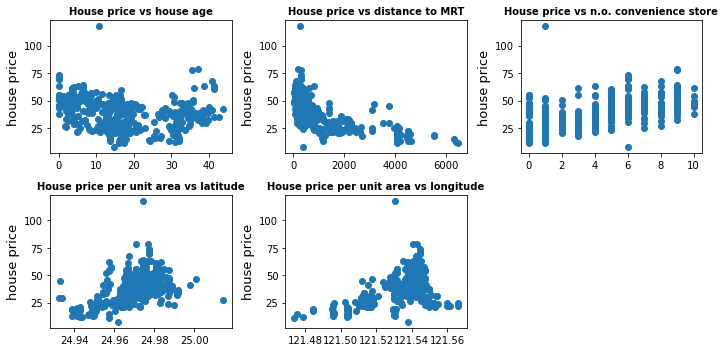

In [5]:
#imported module
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#scatter plot with subplot for each variable

fig=plt.figure(figsize=(10,5))
#plot 1:
y1 = real_estate[real_estate.columns.values[7]][0:414]
x1 = real_estate[real_estate.columns.values[2]][0:414]
plt.subplot(2, 3, 1)
plt.scatter(x1,y1)
plt.title("House price vs house age",fontweight='bold',fontsize=10)
plt.ylabel('house price',fontsize=13)

#plot 2:
y1 = real_estate[real_estate.columns.values[7]][0:414]
x2 = real_estate[real_estate.columns.values[3]][0:414]
plt.subplot(2, 3, 2)
plt.scatter(x2,y1)
plt.title("House price vs distance to MRT",fontweight='bold',fontsize=10)
plt.ylabel('house price',fontsize=13)


#plot 3:
y1 = real_estate[real_estate.columns.values[7]][0:414]
x3 = real_estate[real_estate.columns.values[4]][0:414]
plt.subplot(2, 3, 3)
plt.scatter(x3,y1)
plt.title("House price vs n.o. convenience store",fontweight='bold',fontsize=10)
plt.ylabel('house price',fontsize=13)


#plot 4:
y1 = real_estate[real_estate.columns.values[7]][0:414]
x4 = real_estate[real_estate.columns.values[5]][0:414]
plt.subplot(2, 3, 4)
plt.scatter(x4,y1)
plt.title("House price per unit area vs latitude",fontweight='bold',fontsize=10)
plt.ylabel('house price',fontsize=13)


#plot 5:
y1 = real_estate[real_estate.columns.values[7]][0:414]
x5 = real_estate[real_estate.columns.values[6]][0:414]
plt.subplot(2, 3, 5)
plt.scatter(x5,y1)
plt.title("House price per unit area vs longitude",fontweight='bold',fontsize=10)
plt.ylabel('house price',fontsize=13)



fig.tight_layout()

In [6]:
#defined variable X and Y
X = real_estate[['house age','distance to the nearest MRT station','number of convenience stores','latitude','longitude']] 
y = real_estate['house price of unit area']

In [7]:
#using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
#made regression analysis
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
#extracted coeff for each variable
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
house age,-0.264990
distance to the nearest MRT station,-0.004146
number of convenience stores,1.131915
latitude,239.912594
longitude,-1.235619


In [10]:
#defined y_pred
y_pred = regressor.predict(X_test)

In [21]:
#made a dataframe
y_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
y_pred_df = y_pred_df.sort_index(ascending=True)

In [22]:
y_pred_df

,Actual,Predicted
1,42.2,49.082182
4,43.1,47.812386
5,32.1,33.715458
6,40.3,41.291259
7,46.7,45.568955
...,...,...
371,51.7,42.748119
374,49.5,47.706390
384,12.9,15.286417
402,28.5,40.784775


Text(0.5, 1.0, 'The comparison between actual and predicted value')

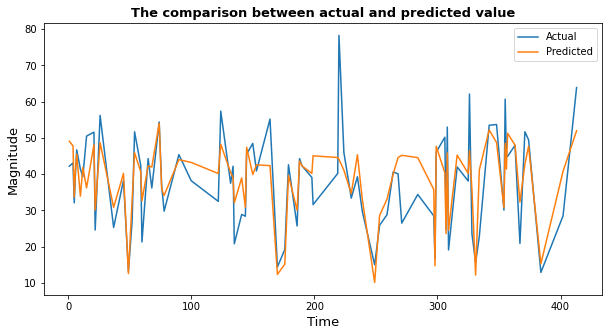

In [25]:
y_pred_df[['Actual','Predicted']].plot(figsize=(10,5))
plt.xlabel('Time',fontsize=13)
plt.ylabel('Magnitude',fontsize=13)
plt.title("The comparison between actual and predicted value",fontweight='bold',fontsize=13)

In [24]:
#evaluated model
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.74592747546254
Mean Squared Error: 62.172235622414014
Root Mean Squared Error: 7.884937261793147
